In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('mushroom.csv')

In [3]:
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [7]:
import seaborn as sns

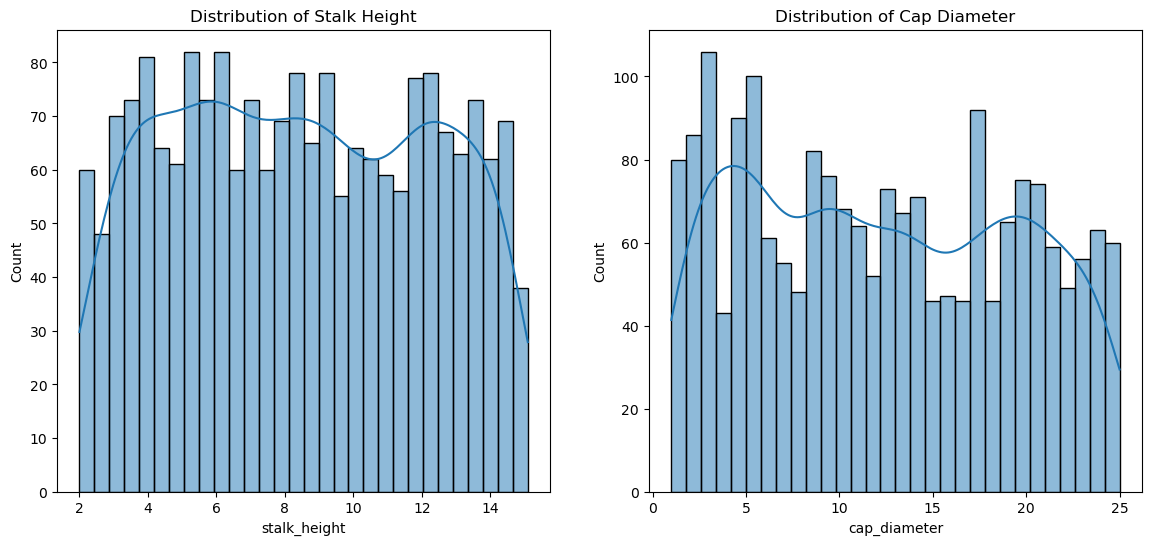

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(data['stalk_height'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Stalk Height')
sns.histplot(data['cap_diameter'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Cap Diameter')
plt.show()

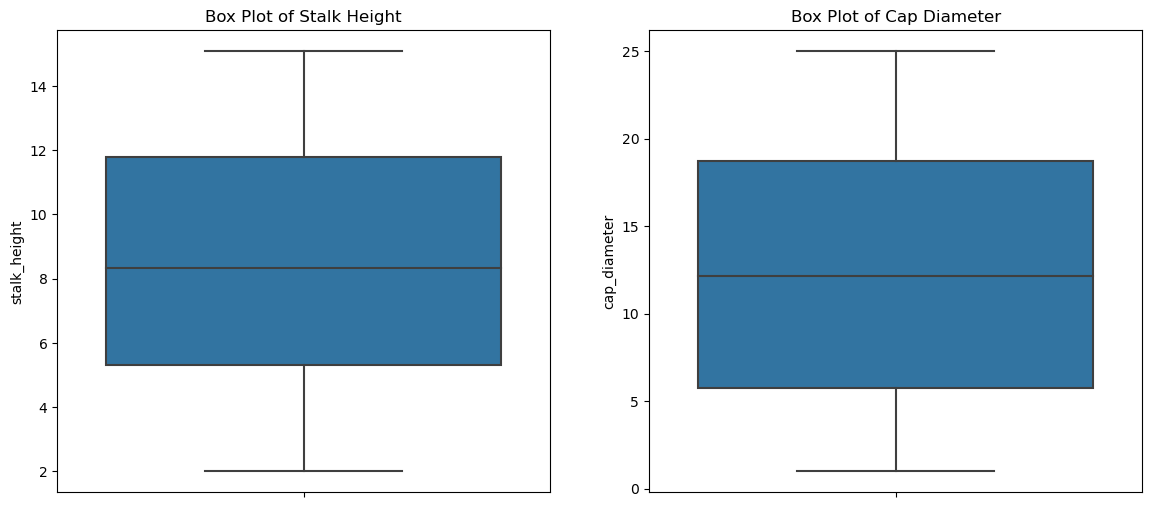

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(y=data['stalk_height'], ax=axes[0])
axes[0].set_title('Box Plot of Stalk Height')
sns.boxplot(y=data['cap_diameter'], ax=axes[1])
axes[1].set_title('Box Plot of Cap Diameter')
plt.show()

In [12]:
data.cap_diameter.value_counts()

3.111415     8
4.988930     8
19.868822    7
18.708607    7
22.788126    7
            ..
23.894319    1
17.800033    1
20.966023    1
19.427505    1
21.056642    1
Name: cap_diameter, Length: 976, dtype: int64

In [16]:
correlation_matrix=data.corr()

C:\Users\asus\AppData\Local\Temp\ipykernel_11400\575618102.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=data.corr()


In [17]:
correlation_matrix

,Unnamed: 0,stalk_height,cap_diameter
Unnamed: 0,1.000000,0.000815,0.042726
stalk_height,0.000815,1.000000,-0.034891
cap_diameter,0.042726,-0.034891,1.000000


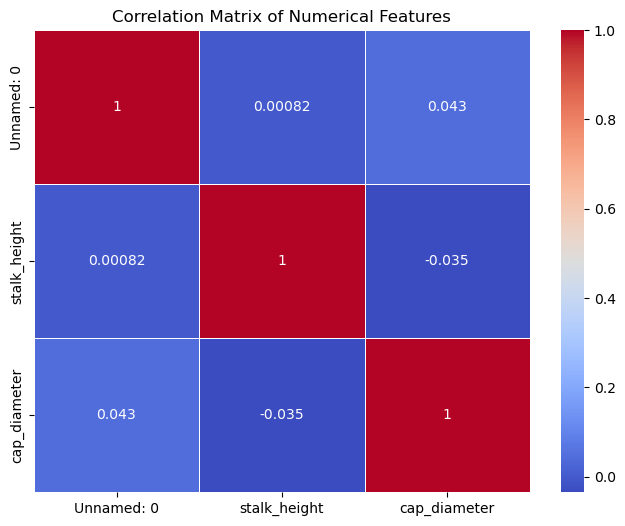

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [19]:
df=pd.get_dummies(data,dtype='int')

In [20]:
df

,Unnamed: 0,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,...,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_edible,class_poisonous
0,1167,14.276173,5.054983,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1037,3.952715,19.068319,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
2,309,9.054265,7.205884,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,282,5.226499,20.932692,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,820,14.037532,12.545245,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,13.020616,9.993008,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1988,926,3.751597,18.868135,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1989,289,13.134058,15.740028,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1996,1160,6.500840,13.501957,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [22]:
target=df[['class_edible']]
target

,class_edible
0,0
1,1
2,0
3,0
4,0
...,...
1985,1
1988,0
1989,1
1996,0


In [23]:
features=df.drop('class_edible',axis=1)
features

,Unnamed: 0,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,...,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
0,1167,14.276173,5.054983,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1037,3.952715,19.068319,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,309,9.054265,7.205884,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,282,5.226499,20.932692,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,820,14.037532,12.545245,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,13.020616,9.993008,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1988,926,3.751597,18.868135,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1989,289,13.134058,15.740028,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1996,1160,6.500840,13.501957,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [24]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(732, 128)
(732, 1)
(244, 128)
(244, 1)


C:\Users\asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


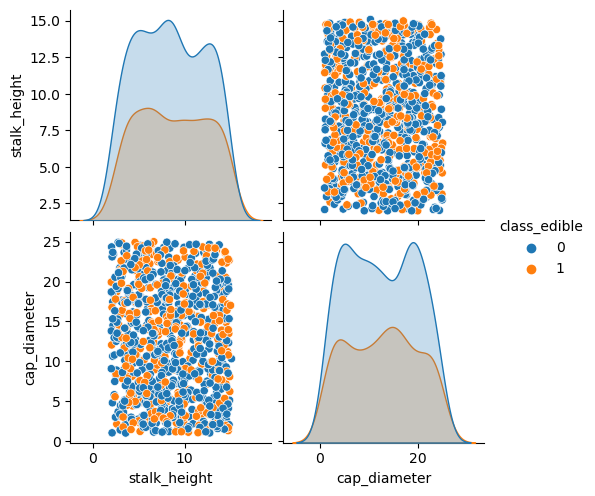

In [27]:
subset_features = ['stalk_height', 'cap_diameter']
subset_data = pd.concat([df[subset_features], target], axis=1)
sns.pairplot(subset_data, hue='class_edible', diag_kind='kde')
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()
y_train= lab_enc.fit_transform(y_train)
y_test= lab_enc.fit_transform(y_test)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
svm_classifier=SVC(kernel='linear',random_state=42)

In [31]:
svc=SVC(C=1.0,kernel='rbf',gamma=0.1)

In [32]:
svc.fit(x_train,y_train)

SVC(gamma=0.1)

In [34]:
y_pred=svc.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred)

0.5901639344262295

In [38]:
confusion_matrix(y_test,y_pred)

array([[144,   0],
       [100,   0]], dtype=int64)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       144
           1       0.00      0.00      0.00       100

    accuracy                           0.59       244
   macro avg       0.30      0.50      0.37       244
weighted avg       0.35      0.59      0.44       244



C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
params={'C':[1,2,3,4,5,6,10,12],'kernel':['linear','poly','rbf','sigmoid'],'gamma':[0.1,0.2,0.3,0.4]}

In [41]:
grid_search=GridSearchCV(svc,params,verbose=2)

In [42]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  54.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  46.3s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  45.9s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 1.0min
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 1.4min
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   3.7s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   3.5s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   3.5s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   4.3s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   3.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0

GridSearchCV(estimator=SVC(gamma=0.1),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 12],
                         'gamma': [0.1, 0.2, 0.3, 0.4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [43]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}